In [125]:
from utils import getData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [126]:
df_firstRound = getData("firstRound")
df_finalRound = getData("finalRound")

In [127]:
df_firstRound

,id,title,keywords,ratings,confidences,withdraw,review_lengths,paper_index
0,kRvZ2PcsxjJj,Quantum reinforcement learning,"['quantum reinforcement learning', 'multi-agen...","[1, 1, 1, 1]","[5, 5, 5, 5]",0,"[45, 49, 25, 283]",0
1,RUzSobdYy0V,Quantifying and Mitigating the Impact of Label...,[],"[5, 6, 8]","[4, 3, 3]",0,"[443, 274, 401]",1
2,N3kGYG3ZcTi,Suppression helps: Lateral Inhibition-inspired...,"['Lateral Inhibition', 'Convolutional Neural N...","[3, 5, 3, 1]","[5, 5, 5, 5]",0,"[333, 360, 362, 304]",2
3,tmIiMPl4IPa,Factorized Fourier Neural Operators,"['fourier transform', 'fourier operators', 'pd...","[8, 6, 3, 8, 3]","[5, 4, 4, 2, 2]",0,"[203, 142, 323, 520, 635]",3
4,mhnHqRqcjYU,DFPC: Data flow driven pruning of coupled chan...,"['Pruning', 'Data Free', 'Model Compression']","[8, 6, 6]","[3, 2, 3]",0,"[302, 90, 257]",4
...,...,...,...,...,...,...,...,...
4869,IJwhRE510b,ELODI: Ensemble Logit Difference Inhibition fo...,"['positive-congruent training', 'negative flip...","[5, 5, 6, 8]","[4, 2, 3, 4]",0,"[711, 446, 464, 1337]",4869
4870,4XMAzZasId,Model-agnostic Measure of Generalization Diffi...,"['generalization', 'inductive bias', 'informat...","[8, 3, 3, 3]","[3, 3, 3, 4]",0,"[595, 802, 1393, 698]",4870
4871,KjKZaJ5Gbv,Efficient Multi-Task Reinforcement Learning vi...,"['Reinforcement Learning', 'Multitask Reinforc...","[3, 5, 3]","[4, 5, 4]",0,"[187, 590, 812]",4871
4872,ED2Jjms9A4H,Efficient Exploration via Fragmentation and Re...,"['fragmentation', 'recall', 'exploration', 'co...","[3, 5, 5, 5]","[4, 4, 3, 3]",0,"[1326, 523, 1099, 580]",4872


In [128]:
# find the id that both in df_firstRound and df_finalRound
id_firstRound = set(df_firstRound['paper_index'])
id_finalRound = set(df_finalRound['paper_index'])
id_both = id_firstRound.intersection(id_finalRound)
print(len(id_both))

4833


In [129]:
# select id_both from df_firstRound and df_finalRound
df_firstRound = df_firstRound[df_firstRound['paper_index'].isin(id_both)]
df_finalRound = df_finalRound[df_finalRound['paper_index'].isin(id_both)]

In [130]:
# check if the 'ratings' column in two frames are the same
# if not, print the data 
count = 0
id_review_mismatch = []
id_review_match = []
for i in range(len(df_firstRound)):
    if len(df_firstRound.iloc[i]['ratings']) != len(df_finalRound.iloc[i]['ratings']):
        id_review_mismatch.append(df_firstRound.iloc[i]['paper_index'])
        count += 1
    else:
        id_review_match.append(df_firstRound.iloc[i]['paper_index'])
        
print(id_review_mismatch, count)


[27, 43, 64, 95, 107, 131, 151, 186, 254, 281, 302, 317, 340, 382, 431, 457, 492, 517, 521, 584, 610, 636, 643, 738, 791, 809, 956, 957, 968, 991, 1006, 1070, 1179, 1208, 1229, 1235, 1236, 1300, 1319, 1382, 1387, 1434, 1462, 1485, 1499, 1523, 1539, 1545, 1562, 1621, 1673, 1686, 1687, 1727, 1732, 1748, 1784, 1806, 1830, 1839, 1945, 1947, 1963, 1978, 2019, 2041, 2043, 2045, 2049, 2113, 2209, 2226, 2241, 2301, 2344, 2373, 2377, 2398, 2422, 2473, 2541, 2598, 2608, 2620, 2673, 2680, 2703, 2754, 2780, 2801, 2826, 2828, 2832, 2874, 2875, 2892, 2913, 3000, 3037, 3091, 3106, 3107, 3170, 3232, 3246, 3285, 3320, 3353, 3387, 3396, 3448, 3523, 3561, 3613, 3638, 3667, 3750, 3754, 3763, 3764, 3776, 3900, 3918, 3944, 4108, 4179, 4194, 4219, 4291, 4308, 4329, 4503, 4556, 4561, 4580, 4609, 4615, 4730, 4735, 4768, 4824, 4843, 4859] 143


In [131]:
# view the data in id_review_mismatch
print('The number of reviews between first round and final round are not the same: ', len(id_review_mismatch))
df_review_mismatch = df_finalRound[df_finalRound['paper_index'].isin(id_review_mismatch)]
print(df_review_mismatch['decision'].value_counts())



The number of reviews between first round and final round are not the same:  143
decision
Reject                     82
Accept: poster             37
Accept: notable-top-25%     9
Name: count, dtype: int64


In [132]:
# select id that not in id_missmatch from both frames
df_firstRound = df_firstRound[df_firstRound['paper_index'].isin(id_review_match)]
df_finalRound = df_finalRound[df_finalRound['paper_index'].isin(id_review_match)]

In [133]:
print(len(df_firstRound), len(df_finalRound))

4690 4690


In [134]:
# define list operation '-'
def list_minus(list1, list2):
    return [i1 - i2 for i1, i2 in zip(list1, list2)]


In [135]:
(df_firstRound['confidences'] == df_finalRound['confidences']).value_counts()

confidences
True     4463
False     227
Name: count, dtype: int64

In [136]:
df_finalRound['diff_score'] = (df_finalRound['ratings'].apply(lambda x:sum(x)/len(x)) - df_firstRound['ratings'].apply(lambda x:sum(x)/len(x))) * df_firstRound['ratings'].apply(lambda x:len(x))

In [137]:
def visualizeAcceptReject(df, score_type, bins=18):
    n_withdraw, bins_withdraw, patches = plt.hist(df[df['withdraw'] == 1][score_type], bins=bins,range=(-5,10), color='y')
    n_reject, bins_reject, patches = plt.hist(df[df['decision'] == 'Reject'][score_type], bins=bins,range=(-5,10),bottom=n_withdraw, color='r')
    n_accept_poster, bins_accept_poster, patches = plt.hist(df[df['decision'] == 'Accept: poster'][score_type], bins=bins,range=(-5,10),bottom=n_withdraw+n_reject, color='g')
    n_accept_25, bins_accept_25, patches = plt.hist(df[df['decision'] == 'Accept: notable-top-25%'][score_type], bins=bins,range=(-5,10),bottom=n_withdraw+n_reject + n_accept_poster, color='b')
    n_accept_5, bins_accept_5, patches = plt.hist(df[df['decision'] == 'Accept: notable-top-5%'][score_type], bins=bins,range=(-5,10),bottom=n_withdraw+n_reject + n_accept_poster + n_accept_25, color='c')

    for bin_val, n_val in zip(bins_withdraw, n_withdraw+n_reject+n_accept_poster+n_accept_25+n_accept_5):
        plt.text(bin_val, n_val+2, str(int(n_val)))
    
    plt.ylim(0, int((n_withdraw+n_reject+n_accept_poster+n_accept_25+n_accept_5).max()*1.1))
    plt.show()

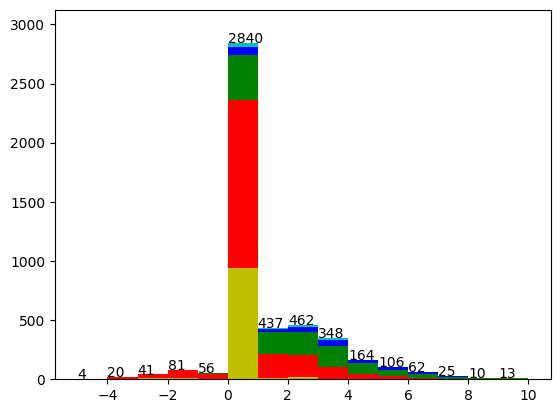

In [138]:
visualizeAcceptReject(df_finalRound, 'diff_score', bins=15)

In [139]:
df_firstRound['avg_score'] = df_firstRound['ratings'].apply(lambda x:sum(x)/len(x))

Text(0, 0.5, 'Difference of Score between First Round and Final Round')

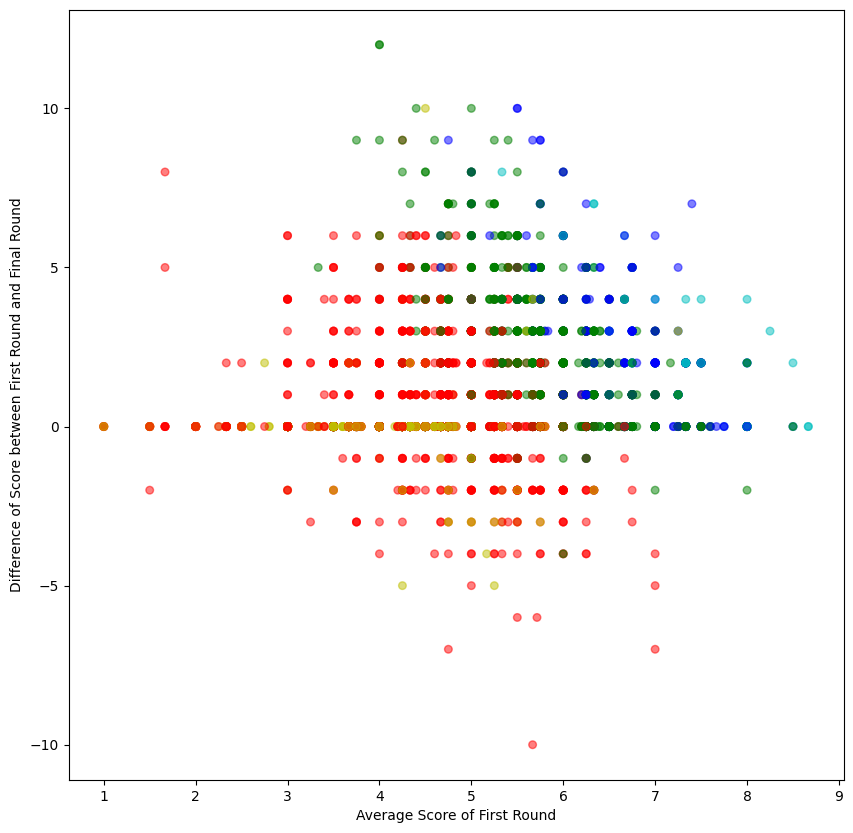

In [140]:
# plot a Scatter plot, x-axis is avergae score of first round, y-axis is diff_score
# if the paper decision is Reject, the color is red, else is green
def colorFormatter(x):
    if x == 'Reject':
        return 'r'
    elif x == 'Accept: poster':
        return 'g'
    elif x == 'Accept: notable-top-25%':
        return 'b'
    elif x == 'Accept: notable-top-5%':
        return 'c'
    else:
        # withdraw
        return 'y'

# make the figure larger
plt.figure(figsize=(10, 10))
# the points are too dense, so use alpha to make the points transparent and the radius smaller
plt.scatter(df_firstRound['avg_score'], df_finalRound['diff_score'], c=df_finalRound['decision'].apply(colorFormatter), alpha=0.5, s=30)
# set x-axis and y-axis label
plt.xlabel('Average Score of First Round')
plt.ylabel('Difference of Score between First Round and Final Round')


In [141]:
# calculate weighted score

def confidenceProjector(score,confidence):
    norm_score = score - 5.5
    confidence_weight = 1 + (int(confidence)-3) * 0.1
    weighted_score = norm_score * confidence_weight + 5.5
    return weighted_score

# ratings * confidence
df_firstRound['weighted_score'] = df_firstRound.apply(lambda x:sum([confidenceProjector(x['ratings'][i],eval(x['confidences'])[i]) for i in range(len(x['ratings']))]), axis=1)
df_finalRound['weighted_score'] = df_finalRound.apply(lambda x:sum([confidenceProjector(x['ratings'][i],eval(x['confidences'])[i]) for i in range(len(x['ratings']))]), axis=1)

df_firstRound['avg_score_weighted'] = df_firstRound['weighted_score'] / df_firstRound['ratings'].apply(lambda x: len(x))
df_finalRound['avg_score_weighted'] = df_finalRound['weighted_score'] / df_finalRound['ratings'].apply(lambda x: len(x))

df_finalRound['diff_score_weighted'] = df_finalRound['weighted_score'] - df_firstRound['weighted_score']

In [142]:
df_firstRound[:5]

,id,title,keywords,ratings,confidences,withdraw,review_lengths,paper_index,avg_score,weighted_score,avg_score_weighted
0,kRvZ2PcsxjJj,Quantum reinforcement learning,"['quantum reinforcement learning', 'multi-agen...","[1, 1, 1, 1]","[5, 5, 5, 5]",0,"[45, 49, 25, 283]",0,1.000000,0.40,0.100000
1,RUzSobdYy0V,Quantifying and Mitigating the Impact of Label...,[],"[5, 6, 8]","[4, 3, 3]",0,"[443, 274, 401]",1,6.333333,18.95,6.316667
2,N3kGYG3ZcTi,Suppression helps: Lateral Inhibition-inspired...,"['Lateral Inhibition', 'Convolutional Neural N...","[3, 5, 3, 1]","[5, 5, 5, 5]",0,"[333, 360, 362, 304]",2,3.000000,10.00,2.500000
3,tmIiMPl4IPa,Factorized Fourier Neural Operators,"['fourier transform', 'fourier operators', 'pd...","[8, 6, 3, 8, 3]","[5, 4, 4, 2, 2]",0,"[203, 142, 323, 520, 635]",3,5.600000,28.30,5.660000
4,mhnHqRqcjYU,DFPC: Data flow driven pruning of coupled chan...,"['Pruning', 'Data Free', 'Model Compression']","[8, 6, 6]","[3, 2, 3]",0,"[302, 90, 257]",4,6.666667,19.95,6.650000


Text(0, 0.5, 'Difference of Score between First Round and Final Round')

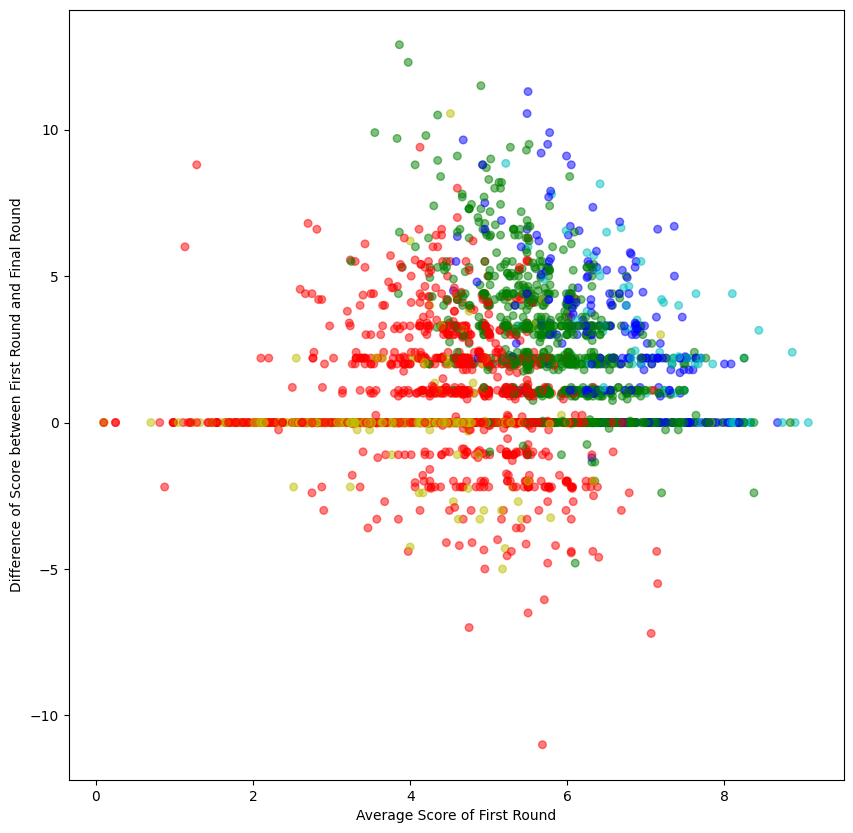

In [143]:
# make the figure larger
plt.figure(figsize=(10, 10))
# the points are too dense, so use alpha to make the points transparent and the radius smaller
plt.scatter(df_firstRound['avg_score_weighted'], df_finalRound['diff_score_weighted'], c=df_finalRound['decision'].apply(colorFormatter), alpha=0.5, s=30)
# set x-axis and y-axis label
plt.xlabel('Average Score of First Round')
plt.ylabel('Difference of Score between First Round and Final Round')

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [146]:
# the model has two input: average score of first round and difference of score between first round and final round
# the output is the decision of final round
X = np.array([df_firstRound['avg_score'],df_finalRound['diff_score'],df_firstRound['avg_score_weighted'],df_finalRound['diff_score_weighted']]).T
y = np.array(df_finalRound['decision'].apply(lambda x: 1 if colorFormatter(x) in ['r','y'] else 0))  
# split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [149]:
def visualizeTheModel(model, X, y, title='Decision Boundary'):
    # plot the points
    plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, s=30)
    # plot the decision boundary
    x1 = np.linspace(0, 10, 100)
    x2 = np.linspace(-5, 10, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Y = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
    plt.contour(X1, X2, Y, colors='k', levels=[0])
    plt.xlabel('Average Score of First Round')
    plt.ylabel('Difference of Score between First Round and Final Round')
    plt.title(title)
    plt.show()

In [151]:
# use a linear regression model to fit the data

# fit the model
model = LinearRegression()
model.fit(X_train[:,:2], y_train)

# predict the test set
y_pred = model.predict(X_test[:,:2])

# calculate the mean squared error
print('Mean squared error for training set: %.2f' % mean_squared_error(y_train, model.predict(X_train[:,:2])))
print('Mean squared error for testing set: %.2f' % mean_squared_error(y_test, y_pred))



Mean squared error for training set: 0.10
Mean squared error for testing set: 0.09


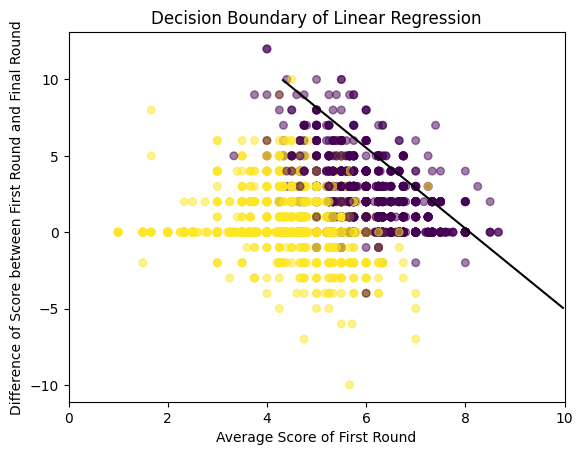

In [152]:
visualizeTheModel(model, X[:,:2], y, title='Decision Boundary of Linear Regression')

In [153]:
# using svm to fit the data
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# use grid search to find the best parameters
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train[:,:2], y_train)

# predict the test set
y_pred = clf.predict(X_test[:,:2])

# calculate the mean squared error
print('Mean squared error for training set: %.2f' % mean_squared_error(y_train, clf.predict(X_train[:,:2])))
print('Mean squared error for testing set: %.2f' % mean_squared_error(y_test, y_pred))



Mean squared error for training set: 0.09
Mean squared error for testing set: 0.07


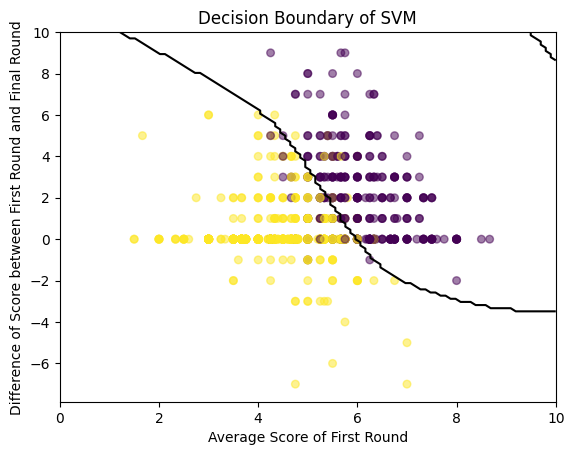

In [154]:
visualizeTheModel(clf, X_test[:,:2], y_test, title='Decision Boundary of SVM')

overfitting:
Mean squared error for training set: 0.09
Mean squared error for testing set: 0.07


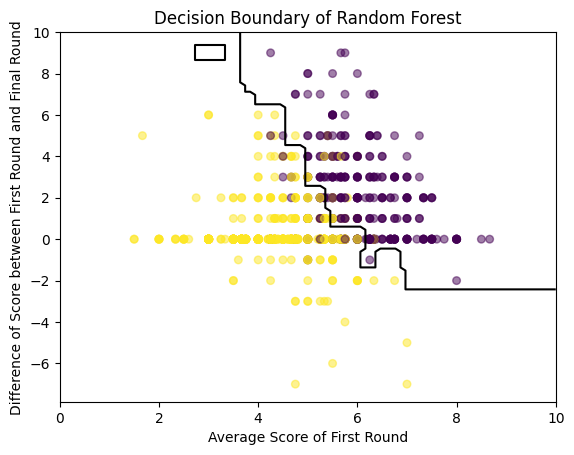

fitting:
Mean squared error for training set: 0.09
Mean squared error for testing set: 0.08


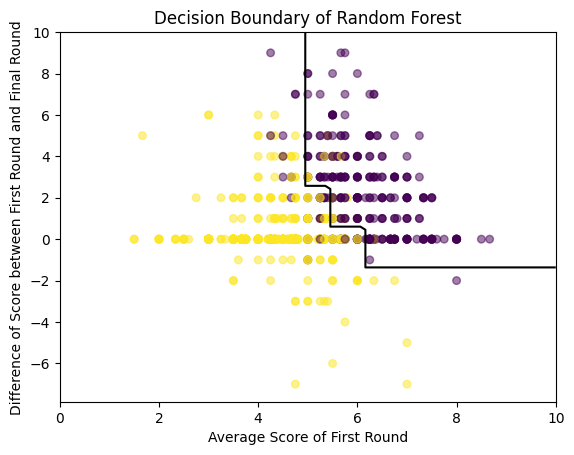

In [156]:
# using random forest to fit the data
from sklearn.ensemble import RandomForestClassifier

# use grid search to find the best parameters
parameters_fitting = {'n_estimators':[50, 100, 150], 'max_depth':[1, 2, 3]}
parameters_overfitting = {'n_estimators':[10, 100, 1000], 'max_depth':[3, 5, 10]}

def randomForest(parameters):
    rf = RandomForestClassifier()
    clf = GridSearchCV(rf, parameters)
    clf.fit(X_train[:,:2], y_train)

    # predict the test set
    y_pred = clf.predict(X_test[:,:2])

    # calculate the mean squared error
    print('Mean squared error for training set: %.2f' % mean_squared_error(y_train, clf.predict(X_train[:,:2])))
    print('Mean squared error for testing set: %.2f' % mean_squared_error(y_test, y_pred))

    visualizeTheModel(clf, X_test[:,:2], y_test, title='Decision Boundary of Random Forest')

print('overfitting:')
randomForest(parameters_overfitting)
print('fitting:')
randomForest(parameters_fitting)

In [157]:
# using svm to fit the data
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# use grid search to find the best parameters
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train[:,2:], y_train)

# predict the test set
y_pred = clf.predict(X_test[:,2:])

# calculate the mean squared error
print('Mean squared error for training set: %.2f' % mean_squared_error(y_train, clf.predict(X_train[:,2:])))
print('Mean squared error for testing set: %.2f' % mean_squared_error(y_test, y_pred))



Mean squared error for training set: 0.09
Mean squared error for testing set: 0.07


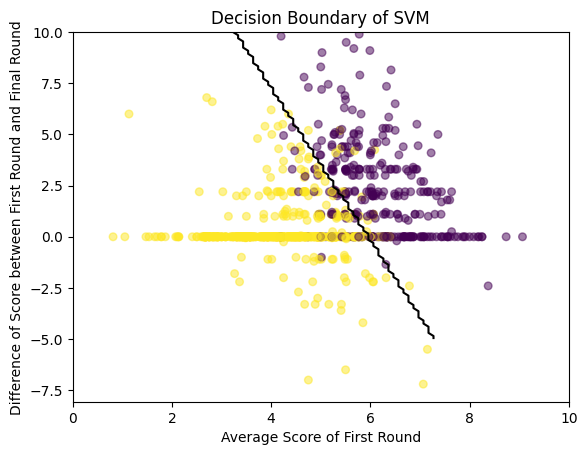

In [158]:
visualizeTheModel(clf, X_test[:,2:], y_test, title='Decision Boundary of SVM')

overfitting:
Mean squared error for training set: 0.08
Mean squared error for testing set: 0.07


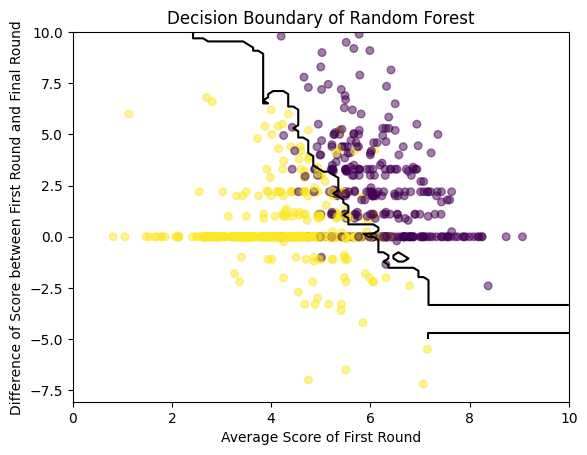

fitting:
Mean squared error for training set: 0.09
Mean squared error for testing set: 0.09


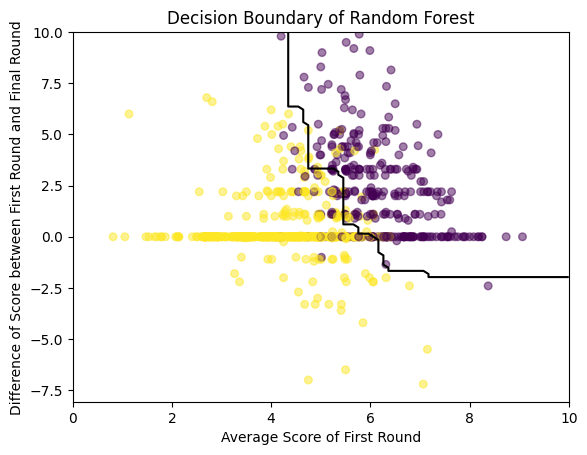

In [159]:
# using random forest to fit the data
from sklearn.ensemble import RandomForestClassifier

# use grid search to find the best parameters
parameters_fitting = {'n_estimators':[50, 100, 150], 'max_depth':[1, 2, 3]}
parameters_overfitting = {'n_estimators':[10, 100, 1000], 'max_depth':[3, 5, 10]}

def randomForest(parameters):
    rf = RandomForestClassifier()
    clf = GridSearchCV(rf, parameters)
    clf.fit(X_train[:,2:], y_train)

    # predict the test set
    y_pred = clf.predict(X_test[:,2:])

    # calculate the mean squared error
    print('Mean squared error for training set: %.2f' % mean_squared_error(y_train, clf.predict(X_train[:,2:])))
    print('Mean squared error for testing set: %.2f' % mean_squared_error(y_test, y_pred))

    visualizeTheModel(clf, X_test[:,2:], y_test, title='Decision Boundary of Random Forest')

print('overfitting:')
randomForest(parameters_overfitting)
print('fitting:')
randomForest(parameters_fitting)